# 📊 TELCO Customer Churn Analysis

This notebook explores customer churn data from a telecommunications company (TELCO).  
The goal is to identify churn patterns, revenue implications, and key drivers influencing customer retention.

**Author:** Joachin Agu  
**Tools:** Python · Pandas · Matplotlib · Power BI · SQL

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Documents\Data Files\Data Challenge\DC3\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 🔧 Data Cleaning


In [2]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges (only a few)
df = df.dropna(subset=['TotalCharges'])

# Check dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### 📈 Churn Summary


In [3]:
# Calculate churn statistics
churn_rate = df['Churn'].value_counts(normalize=True) * 100
avg_monthly = df.groupby('Churn')['MonthlyCharges'].mean()
avg_total = df.groupby('Churn')['TotalCharges'].mean()
avg_tenure = df.groupby('Churn')['tenure'].mean()

print("Churn Rate (%):\n", churn_rate)
print("\nAverage Monthly Charges:\n", avg_monthly)
print("\nAverage Total Charges:\n", avg_total)
print("\nAverage Tenure (months):\n", avg_tenure)


Churn Rate (%):
 Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

Average Monthly Charges:
 Churn
No     61.307408
Yes    74.441332
Name: MonthlyCharges, dtype: float64

Average Total Charges:
 Churn
No     2555.344141
Yes    1531.796094
Name: TotalCharges, dtype: float64

Average Tenure (months):
 Churn
No     37.650010
Yes    17.979133
Name: tenure, dtype: float64


### 📊 Visual Insights


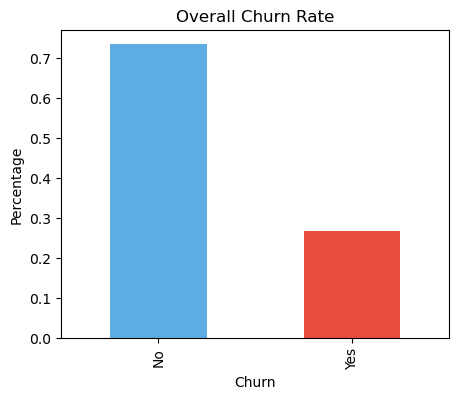

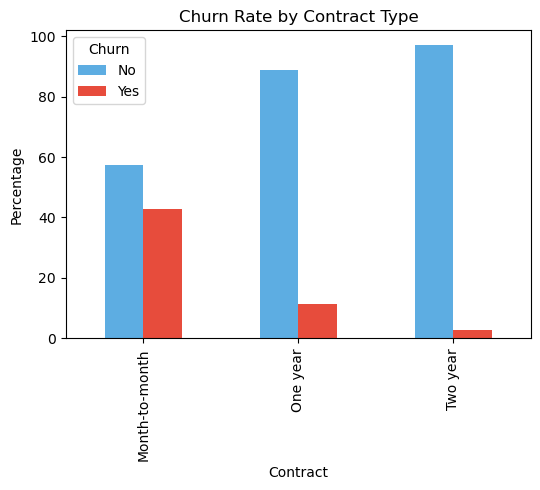

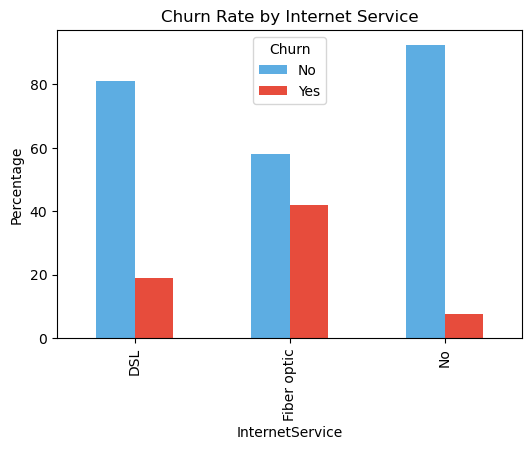

In [4]:
# Overall churn rate
plt.figure(figsize=(5,4))
df['Churn'].value_counts(normalize=True).plot(kind='bar', color=['#5DADE2', '#E74C3C'])
plt.title('Overall Churn Rate')
plt.ylabel('Percentage')
plt.show()

# Churn by Contract Type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
contract_churn.plot(kind='bar', figsize=(6,4), color=['#5DADE2', '#E74C3C'])
plt.title('Churn Rate by Contract Type')
plt.ylabel('Percentage')
plt.show()

# Churn by Internet Service
internet_churn = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack() * 100
internet_churn.plot(kind='bar', figsize=(6,4), color=['#5DADE2', '#E74C3C'])
plt.title('Churn Rate by Internet Service')
plt.ylabel('Percentage')
plt.show()


### 💡 Key Insights


- **Overall churn rate:** ~26.6%  
- **Churned customers** have higher monthly charges but lower total revenue (shorter tenure).  
- **Month-to-month** customers are most likely to churn (42.7%).  
- **Two-year** contract customers show very low churn (2.8%).  
- **Fiber optic** customers churn nearly twice as often as DSL users.  
- **Senior citizens** churn almost twice as much as younger customers.

These insights help TELCO focus on customer segments at higher risk and design better retention campaigns.
